# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [127]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay


df = pd.read_csv('C:\\Users\mateu\Documents\CienciaDeDados\Terceiro_Modulo_arvores\metadados.csv')

#corrigindo alguns dados
df = df.drop(columns=['Unnamed: 0'])
df = df[df['tempo_emprego'] != -1000]
df.reset_index(drop=True, inplace=True)

df_train = df.head(3910)
df_teste = df.tail(1675)

df

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,1,1,1,0,58,3,1,0,0,0,...,1,1,0,0,0,1,0,0,0,0
1,0,0,1,0,52,8,1,0,1,1,...,1,0,0,1,0,1,0,0,0,0
2,1,1,1,0,46,2,1,1,1,1,...,0,1,0,0,0,1,0,0,0,0
3,0,1,0,0,29,3,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,0,0,1,0,27,4,1,0,1,0,...,1,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5581,0,0,1,1,34,3,1,1,1,0,...,1,0,0,1,0,1,0,0,0,0
5582,0,0,1,0,54,9,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
5583,0,0,1,0,43,7,1,1,1,0,...,1,1,0,0,0,1,0,0,0,0
5584,1,1,1,0,30,9,1,1,0,0,...,1,1,0,0,0,1,0,0,0,0


#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [128]:
y = df_train.mau
X = df_train.drop(columns=['mau'])
y.value_counts()

mau
0    3832
1      78
Name: count, dtype: int64

In [129]:
clf = DecisionTreeClassifier(random_state=100)
clf.fit(X,y)


DecisionTreeClassifier(random_state=100)

[Text(0.6820310063922669, 0.9761904761904762, 'x[3] <= 1.5\ngini = 0.039\nsamples = 3910\nvalue = [3832, 78]'),
 Text(0.5137346039912691, 0.9285714285714286, 'x[5] <= 4.5\ngini = 0.035\nsamples = 3445\nvalue = [3383, 62]'),
 Text(0.3839550202681634, 0.8809523809523809, 'x[22] <= 0.5\ngini = 0.047\nsamples = 1541\nvalue = [1504, 37]'),
 Text(0.31670954162768944, 0.8333333333333334, 'x[25] <= 0.5\ngini = 0.044\nsamples = 1507\nvalue = [1473, 34]'),
 Text(0.21215310258808856, 0.7857142857142857, 'x[5] <= 0.5\ngini = 0.043\nsamples = 1498\nvalue = [1465, 33]'),
 Text(0.06423448705955721, 0.7380952380952381, 'x[4] <= 35.5\ngini = 0.07\nsamples = 275\nvalue = [265, 10]'),
 Text(0.03617087620829436, 0.6904761904761905, 'x[10] <= 2.5\ngini = 0.115\nsamples = 114\nvalue = [107, 7]'),
 Text(0.031181789834736514, 0.6428571428571429, 'x[18] <= 0.5\ngini = 0.165\nsamples = 77\nvalue = [70, 7]'),
 Text(0.009978172747115684, 0.5952380952380952, 'x[3] <= 0.5\ngini = 0.053\nsamples = 37\nvalue = [36, 1

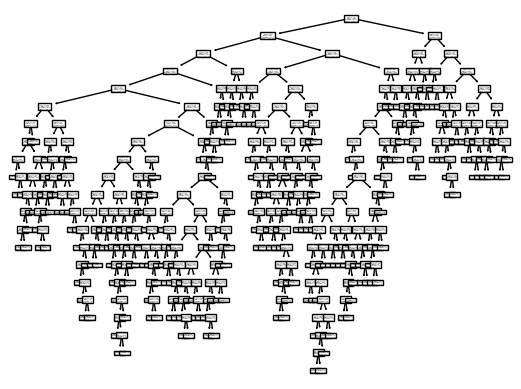

In [130]:
tree.plot_tree(clf)

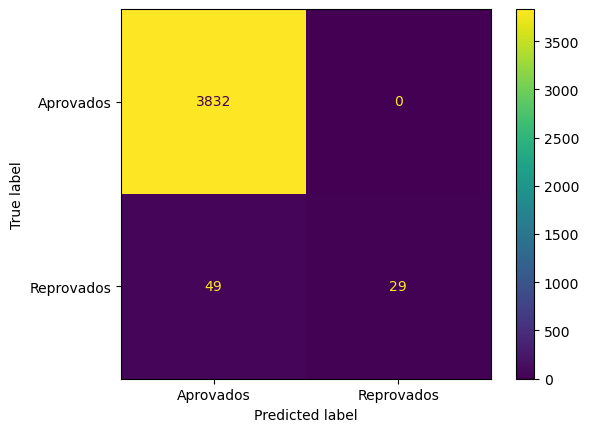

In [131]:
predictions = clf.predict(X)
cm = confusion_matrix(y, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])
disp.plot()

In [132]:
predict = clf.predict(X)
accuracy_score(y, predict)

0.9874680306905371

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [142]:
y = df_teste.mau
X = df_teste.drop(columns=['mau'])

clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(X,y)

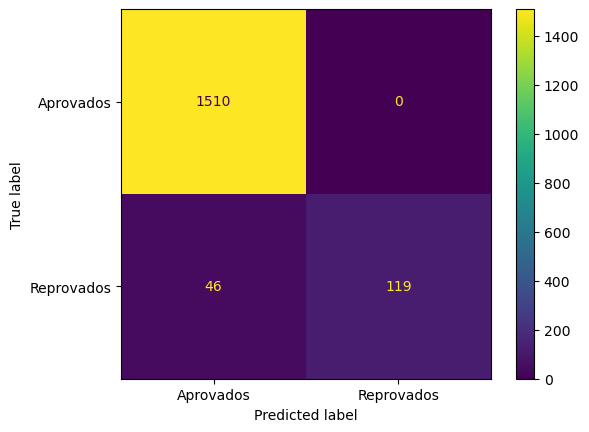

In [136]:
predictions = clf.predict(X)
cm = confusion_matrix(y, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])
disp.plot()

In [137]:
predict = clf.predict(X)
accuracy_score(y, predict)

0.9725373134328358

In [138]:
clf = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
clf = clf.fit(X,y)
predict = clf.predict(X)
accuracy_score(y, predict)

0.9140298507462686

In [147]:
y = y.replace(to_replace=1, value=0)
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(X,y)

In [148]:
predict = clf.predict(X)
accuracy_score(y, predict)

1.0